In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MachineLearning import *

In [8]:
training_df = pd.read_csv('large_training_data.csv', index_col=0)
results_df = pd.read_csv('std_summary.csv')
ordered_strats = results_df.Name.values
model_strats = ordered_strats[::5] # every 5th strategy when order by rank from round robin tournament
model_train_df, model_score_df = split_dataframe(model_strats, training_df)
lr_model, svc_model = create_models_for_sample(model_train_df)

In [74]:
results_file_path = '/Users/James/Desktop/memory1.csv'
memory1_comparison_df = pd.read_csv(results_file_path)



In [77]:
memory1_comparison_df = memory1_comparison_df[memory1_comparison_df.Epsilon != 0.02]
prediction_df = memory1_comparison_df.copy()
memory1_results_df = memory1_comparison_df.copy()
prediction_df.drop(['Name_A', 'Name_B', 'Epsilon'], axis=1, inplace=True)
predictions = svc_model.predict(X=prediction_df)
memory1_results_df = memory1_comparison_df.copy()
memory1_results_df['Prediction'] = predictions
memory1_results_df = memory1_results_df[['Name_A', 'Name_B', 'Epsilon', 'Prediction']]

line_results_df = memory1_results_df.groupby('Epsilon')['Prediction'].agg(['sum','count']).reset_index()
violin_results_df = memory1_results_df.groupby(['Epsilon', 'Name_A'])['Prediction'].agg(['sum','count']).reset_index()
line_results_df['Proportion Correct'] = 1 - line_results_df['sum']/line_results_df['count']
violin_results_df['Proportion Correct'] = 1 - violin_results_df['sum']/violin_results_df['count']
violin_results_df.drop(['sum', 'count', 'Name_A'], axis=1, inplace=True)

violin_groups = violin_results_df.groupby('Epsilon')['Proportion Correct'].apply(list)
pos = violin_results_df['Epsilon'].unique()
proportions = violin_groups.tolist()

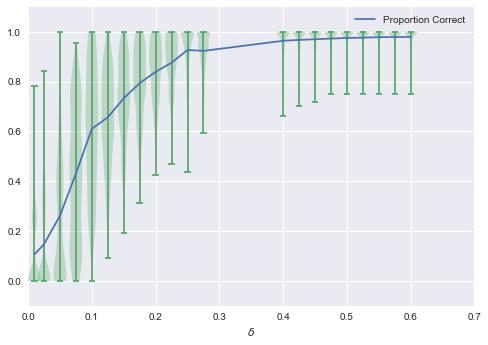

In [78]:
fig, ax = plt.subplots()
line_results_df.plot(x='Epsilon', y='Proportion Correct', ax=ax)
plt.violinplot(proportions, positions=pos, widths=0.02)
plt.xlabel('$\delta$')
plt.xlim([0, 0.7])
plt.ylim([-0.1, 1.1])
plt.savefig('/Users/James/Projects/FinalYearReport-Manuscript/img/ML/proportion-correct.png', bbox_inches='tight')
plt.show()